In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = '0'
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' #omit info 
from learnMSA.msa_hmm import Configuration, Align, Visualize, Clustering
from learnMSA.msa_hmm.SequenceDataset import SequenceDataset
import numpy as np

2025-01-13 14:16:40.865604: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-13 14:16:40.881732: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-13 14:16:40.886596: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
I0000 00:00:1736774202.217536 1738829 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1736774202.254629 1738829 cuda_executor.cc:1015] succ

## learnMSA tree demo

In this notebook, we will fit a number of HMM models to a dataset of unaligned sequences. 
We will then use the fitted models to align the sequences and compare the results.
Moreover, we will visualize the best (according to an objective criterion) model and alignment.

*This notebook is meant to be a demo for running learnMSA in Python code. Check the readme if you want to run learnMSA from the command line.* 

Change the variables in the following cell to fit your needs.

In [2]:
# Your fasta file with unaligned sequences.

train_filename = "test/data/egf.fasta"

# Reference file with aligned sequences that have matching IDs to (potentially a subset of) the 
# sequences in the train_file.
# Replace with empty string if no reference is available.
ref_filename = "test/data/egf.ref"

# The number of independently trained models.
num_models = 2

# Use sequence weights based on a rapid pre-clustering of the sequences (requires mmseqs2 to be installed)
use_weights = True

# Align long insertions with an external aligner left unaligned by the main MSA stage (requires famsa to be installed).
align_insertions = True

## Run learnMSA from Python (Training + Viterbi alignment)

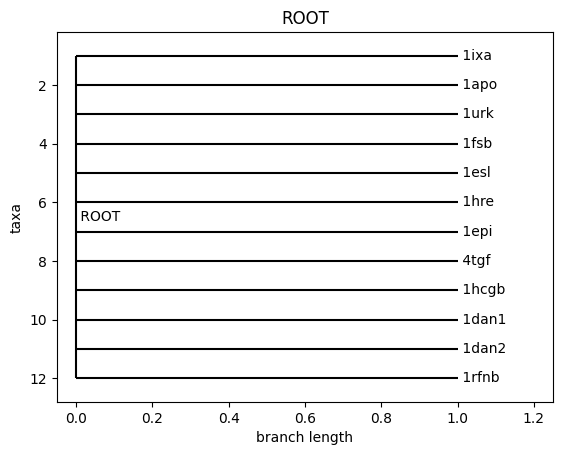

In [3]:
with SequenceDataset("test/data/egf.ref", fmt="fasta") as data:
    tree_handler = Clustering.star_tree(data.seq_ids)
    tree_handler.draw()

In [4]:
!head "test/data/bowman.fasta"

>B2RG91_9FABA/55-80
CCDQCACTKSIPPQCRCSDLRLNSCH
>B2RG93_9FABA/56-81
CCDQCACTKSIPPQCRCSDLRLNSCH
>A0JKC9_9FABA/56-81
CCDQCACTKSIPPQCRCSDLRLNSCH
>A0JKD0_9FABA/56-81
CCDQCACTKSIPPQCRCSDLRLNSCH
>B2RG92_9FABA/56-81
CCDQCACTKSIPPQCRCSDLRLNSCH


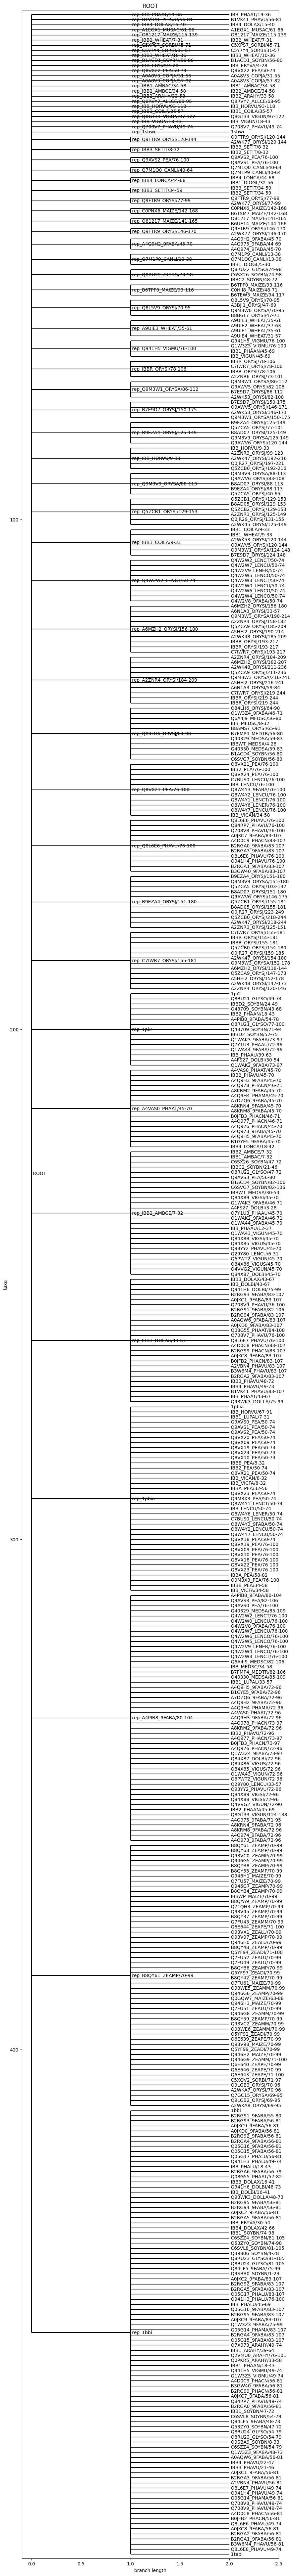

In [5]:
import matplotlib.pyplot as plt

clustering = Clustering.compute_clustering("test/data/bowman.fasta", cluster_seq_id=0.5)
fig = plt.figure(figsize=(10, 100), dpi=100)
axes = fig.add_subplot(1, 1, 1)
tree_handler = Clustering.cluster_tree(clustering)
tree_handler.draw(axes)

In [6]:
out_filename = "test/data/interactive.alignment.fasta"
with SequenceDataset(train_filename, fmt="fasta") as data:
    tree_handler = Clustering.star_tree(data.seq_ids)
    print(tree_handler.to_newick())
    config = Configuration.make_default(num_models, tree_handler=tree_handler)
    config["crop_long_seqs"] = int(np.ceil(2 * np.mean(data.seq_lens))) #comment out to disable cropping
    alignment_model = Align.run_learnMSA(data,
                                        out_filename,
                                        config, 
                                        sequence_weights=Clustering.compute_sequence_weights(train_filename, "tmp", config["cluster_seq_id"]) 
                                            if use_weights else None,
                                        verbose=True,
                                        align_insertions=align_insertions)
    Visualize.print_and_plot(alignment_model, alignment_model.best_model)

(B3RNP9_TRIAD/78-108:1.00000,B3RZW6_TRIAD/380-410:1.00000,B6EBG3_PERAM/120-151:1.00000,B4Q0L7_DROYA/117-148:1.00000,B3NTZ8_DROER/120-151:1.00000,NOTCH_DROME/143-174:1.00000,B4IA25_DROSE/120-151:1.00000,B5DM97_DROPS/135-166:1.00000,B4GYL6_DROPE/117-148:1.00000,B3N1W3_DROAN/140-173:1.00000,B4L8A9_DROMO/212-243:1.00000,B4MCT2_DROVI/116-147:1.00000,B4JJG8_DROGR/143-174:1.00000,B4NQ59_DROWI/118-149:1.00000,Q7Z1J1_DROME/56-90:1.00000,Q7Z1J0_DROSI/56-90:1.00000,Q7YSR5_DROME/56-90:1.00000,Q7KPY6_LUCCU/87-118:1.00000,Q25253_LUCCU/125-156:1.00000,Q16TK9_AEDAE/139-170:1.00000,A0NBR1_ANOGA/72-103:1.00000,B0WGH6_CULQU/65-96:1.00000,Q68QF3_LITFO/113-144:1.00000,Q8I6X6_BOOMI/118-149:1.00000,A0MK40_9CRUS/106-137:1.00000,Q8I499_CUPSA/46-77:1.00000,Q869J7_9MYRI/118-149:1.00000,B3RNP6_TRIAD/203-238:1.00000,C3ZBX6_BRAFL/360-385:1.00000,A7RST6_NEMVE/28-61:1.00000,B3RX46_TRIAD/1-28:1.00000,B3SCF4_TRIAD/1-31:1.00000,B3SC77_TRIAD/211-241:1.00000,B3RRK2_TRIAD/2-32:1.00000,B4Y0U8_9METZ/219-251:1.00000,A7T290_NE

IndexError: index 68 is out of bounds for axis 1 with size 68

In [ ]:
!id_list=$(sed -n '/^>/p' {ref_filename} | sed 's/^.//') ; export MAX_N_PID_4_TCOFFEE=10000000 ; t_coffee -other_pg seq_reformat -in test/data/interactive.alignment.fasta -action +extract_seq_list ${{id_list[@]}} +rm_gap > test/data/interactive.projection.fasta

In [ ]:
!t_coffee -other_pg aln_compare -al1 {ref_filename} -al2 test/data/interactive.projection.fasta -compare_mode sp